In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


In [9]:
data=df.copy()

In [10]:
data

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


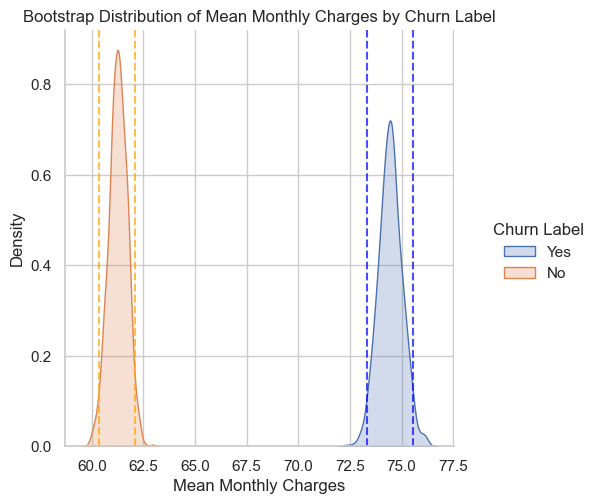

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["Monthly Charges"]
no_data = data[data["Churn Label"] == "No"]["Monthly Charges"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "Monthly Charges": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="Monthly Charges",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean Monthly Charges", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean Monthly Charges by Churn Label")

# Show the plot
plt.show()


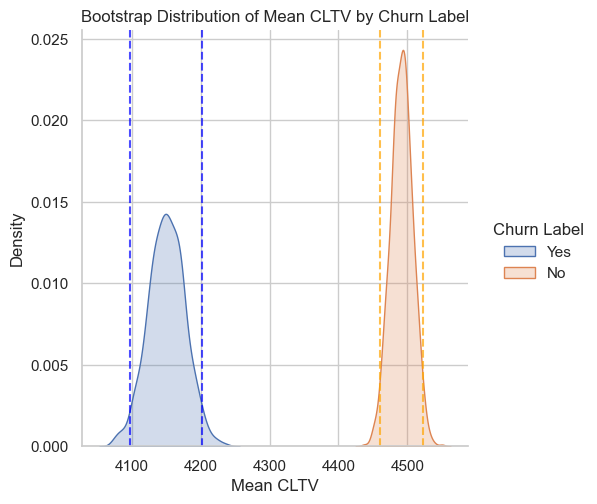

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["CLTV"]
no_data = data[data["Churn Label"] == "No"]["CLTV"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "CLTV": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="CLTV",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean CLTV", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean CLTV by Churn Label")

# Show the plot
plt.show()


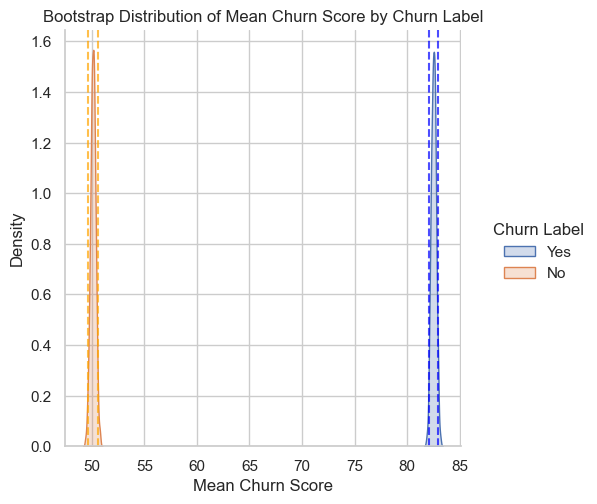

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["Churn Score"]
no_data = data[data["Churn Label"] == "No"]["Churn Score"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "Churn Score": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="Churn Score",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean Churn Score", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean Churn Score by Churn Label")

# Show the plot
plt.show()
